In [30]:
import numpy as np
import torch
import torch.nn as nn

In [31]:
#Data preparation
data = np.genfromtxt(r'E:\AIO\PyTorch\Data\iris_2D_demo.csv', delimiter=',', skip_header=1)
x_data = torch.from_numpy(data[:, 0:2]).float()
y_data = torch.from_numpy(data[:, 2:]).float()
print(x_data)
print(y_data)

tensor([[1.4000, 0.2000],
        [1.5000, 0.2000],
        [3.0000, 1.1000],
        [4.1000, 1.3000]])
tensor([[0.],
        [0.],
        [1.],
        [1.]])


In [32]:
num_epoch = 2000
N = len(y_data)
N

4

In [33]:
#Create a linear year
model = nn.Linear(2, 1)

#set value (for illustration)
model.weight.data = torch.Tensor([[0.5, -0.1]])
model.bias.data = torch.Tensor([0.1])

#print
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.5000, -0.1000]], requires_grad=True)
Parameter containing:
tensor([0.1000], requires_grad=True)


In [34]:
loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),
                            lr=0.1)

In [35]:
#training
losses = []
for epoch in range(num_epoch):
    #y_hat
    y_hat = torch.sigmoid(model(x_data)) 
    
    #loss
    loss = loss_fn(y_hat, y_data)

    #compute gradient
    optimizer.zero_grad()
    loss.backward()
    losses.append(loss.item())

    #update
    optimizer.step()

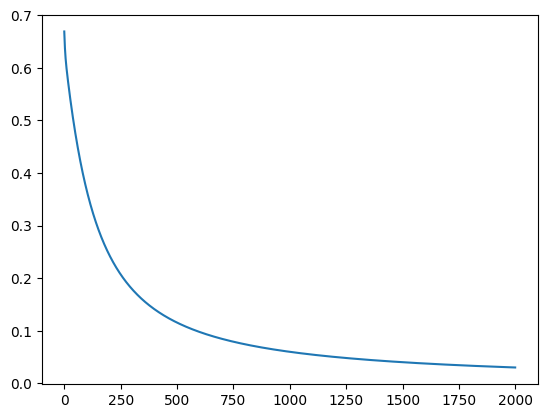

In [36]:
import matplotlib.pyplot as plt
plt.plot(losses)

# Using nn.BCEWithLogitsLoss(the sigmoid function is called automatically inside loss)

In [37]:
#Creat a linear layer
model = nn.Linear(2, 1)

#some params
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(),
                            lr=0.1)

num_epoch = 2000

#traning
losses = []
for epoch in range(num_epoch):
    #predict
    z = model(x_data)

    #loss
    loss = loss_fn(z, y_data)

    #compute gradient
    optimizer.zero_grad()
    loss.backward()
    losses.append(loss.item())

    #update
    optimizer.step()


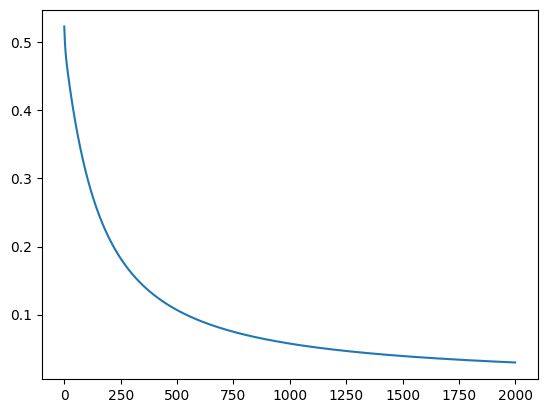

In [38]:
import matplotlib.pyplot as plt
plt.plot(losses)